# **Quality Check**

## **Dependencies**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Load Data Frames**

### Bundesministerium für wirtschaftliche Zusammenarbeit (BMZ) 

In [27]:
bmz_df = pd.read_csv("../../src/transformed_bmz.csv")
bmz_df.head(1)

,iati_id,title_en,title_other,organization,country,region,location,description_en,description_other,status,...,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,sgd_goal_code,sgd_goal_name,sgd_target_code,sgd_target_name,docs
0,DE-1-201629492-0,Basic health services with focus on reducing m...,Basisgesundheitsdienste zur Senkung der Mütter...,Bundesministerium für wirtschaftliche Zusammen...,['SS'],NaN,['Juba'],Basic health services with focus on reducing m...,Basisgesundheitsdienste zur Senkung der Mütter...,Finalisation,...,2024-01-22T00:00:00Z,12230;,Basic health infrastructure;,NaN,NaN,NaN,NaN,NaN,NaN,"['https://www.bmz.de/de/laender/suedsudan', 'h..."
1,DE-1-201673854-0,Sustainable Water Sources and Livelihoods amon...,Nachhaltige Wasserversorgung und Lebensunterhalt,Bundesministerium für wirtschaftliche Zusammen...,['SS'],NaN,['Juba'],Sustainable Water Sources and Livelihoods amon...,Nachhaltige Wasserversorgung und Lebensunterha...,Finalisation,...,2024-01-22T00:00:00Z,43040;,Rural development;,NaN,NaN,NaN,NaN,NaN,NaN,"['https://www.bmz.de/de/laender/suedsudan', 'h..."


### Inter-American Development Bank (IAD)

In [88]:
iad_df = pd.read_csv("../../src/transformed_iad.csv")
iad_df.head(1)

,iati_id,title_en,title_other,organization,country,region,location,description_en,description_other,status,...,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,sgd_goal_code,sgd_goal_name,sgd_target_code,sgd_target_name,docs
0,XI-IATI-IADB-BH-L1056,Strengthening Disaster Risk Management Governa...,Fortalecimiento de la Gobernanza para la Gesti...,Inter-American Development Bank,['BS'],NaN,NaN,The objective of the program is to improve the...,El objetivo del programa es mejorar la goberna...,Closed,...,2024-02-16T05:02:12Z,41010;,Environmental policy and administrative manage...,NaN,NaN,NaN,NaN,NaN,NaN,['https://www.iadb.org/document.cfm?id=EZIDB00...
1,XI-IATI-IADB-BA-L1050,Programme to Strengthen Public Policy and Fisc...,Programa de Fortalecimiento la Política Públic...,Inter-American Development Bank,['BB'],NaN,"['Jobs and Investment Council, established Pro...",The overall objective of the programme is to s...,El objetivo general del programa es fortalecer...,Closed,...,2024-02-16T05:02:07Z,15110;,Public sector policy and administrative manage...,NaN,NaN,NaN,NaN,NaN,NaN,['https://www.iadb.org/document.cfm?id=EZSHARE...


### Asian Development Bank (ADB)

In [92]:
adb_df = pd.read_csv("../../src/transformed_adb.csv")
adb_df.head(1)

,iati_id,title_en,title_other,organization,country,region,location,description_en,description_other,status,...,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,sgd_goal_code,sgd_goal_name,sgd_target_code,sgd_target_name,docs
0,XM-DAC-46004-50063-001-LN3481,Kashkadarya Regional Road Project,NaN,Asian Development Bank,['UZ'],NaN,"['Kitob', 'Qarshi', 'Shahrisabz']",The project will rehabilitate a 77 km section ...,NaN,Finalisation,...,2023-12-18T17:27:00Z,21023;,National road construction;,NaN,NaN,NaN,NaN,NaN,NaN,['https://www.adb.org/sites/default/files/proj...
1,XM-DAC-46004-43151-023-LN2629,Talimarjan Power Project (formerly Central Asi...,NaN,Asian Development Bank,['UZ'],NaN,['Nishon Tumani'],The project involves a new power plant to impr...,NaN,Finalisation,...,2023-12-18T17:27:00Z,23183;,Energy conservation and demand-side efficiency;,NaN,NaN,NaN,NaN,NaN,NaN,['https://www.adb.org/sites/default/files/proj...


### African Development Bank (ADF)

In [116]:
adf_df = pd.read_csv("../../src/transformed_adf.csv")
adf_df.head(1)

,iati_id,title_en,title_other,organization,country,region,location,description_en,description_other,status,...,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,sgd_goal_code,sgd_goal_name,sgd_target_code,sgd_target_name,docs
0,46002-P-CI-EBA-005,"ETUDE ASSAIN. DALOA, GAGNOA & SAN-PEDRO","Etude d' Assainissement de Daloa, Gagnoa & Sa...",African Development Bank,['CI'],NaN,"['Daloa', 'San Pédro']",NaN,Cette étude vise à permettre au Gouvernement d...,Cancelled,...,2024-02-14T18:32:30Z,14022;,Sanitation - large systems;,NaN,NaN,NaN,NaN,NaN,NaN,['https://projectsportal.afdb.org/dataportal/V...


### European Investment Bank (EIB)

In [118]:
eib_df = pd.read_csv("../../src/transformed_eib.csv")
eib_df.head(1)

,iati_id,title_en,title_other,organization,country,region,location,description_en,description_other,status,...,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,sgd_goal_code,sgd_goal_name,sgd_target_code,sgd_target_name,docs
0,XM-DAC-918-3-20010242-84835,MOMA TITANIUM D,NaN,European Investment Bank,['MZ'],NaN,NaN,"Mining, concentration and separation of heavy ...",NaN,Finalisation,...,2024-02-15T09:32:54Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['http://www.eib.org/en/registers/all/index.ht...


### The World Bank (WB)

In [121]:
wb_df = pd.read_csv("../../src/transformed_wb.csv")
wb_df.head(1)

,iati_id,title_en,title_other,organization,country,region,location,description_en,description_other,status,...,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,sgd_goal_code,sgd_goal_name,sgd_target_code,sgd_target_name,docs
0,44000-P101414,Eastern Caribbean Energy Regulatory Authority ...,NaN,World Bank,NaN,['389'],NaN,The objective of the Project is to establish a...,NaN,Finalisation,...,2024-01-27T18:20:31Z,23111;,"Energy sector policy, planning and administrat...",NaN,NaN,NaN,NaN,NaN,NaN,['http://documents.worldbank.org/curated/en/47...


## **NaN Values**

In [122]:
columns = bmz_df.columns

orgas = {
    "BMZ": [bmz_df],
    "IAD": [iad_df],
    "ADB": [adb_df],
    "ADF": [adf_df],
    "EIB": [eib_df],
    "WB": [wb_df],
}

# extract the nan values for each orga
for i in orgas:
    df = orgas[i][0]
    df_len = len(df)
    nan_list = []
    for c in columns:
        nan_count = df[c].isna().sum() 
        non_nan_perc = round(1 - nan_count / df_len, 2)
        nan_list.append(non_nan_perc)
    orgas[i].append(nan_list)

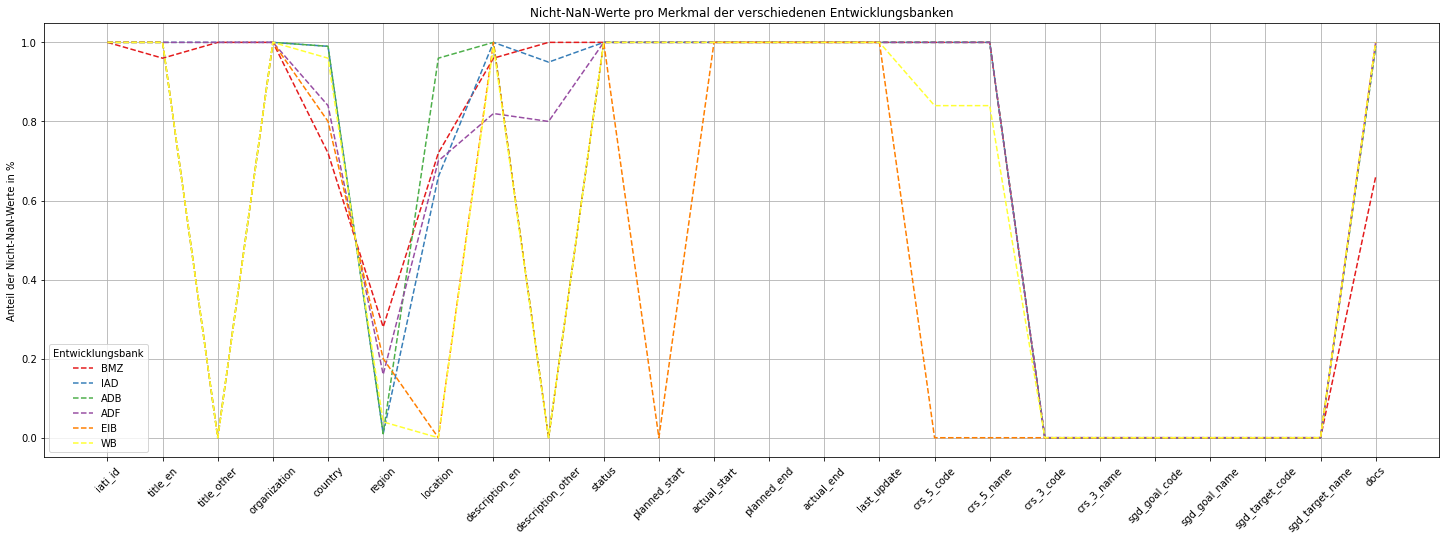

In [123]:
plt.figure(figsize=(25, 8))
palette = sns.color_palette("Set1")

for idx, (key, values) in enumerate(orgas.items()):
    sns.lineplot(x=range(len(values[1])), y=values[1], label=key, linestyle="--", color=palette[idx])

plt.title('Nicht-NaN-Werte pro Merkmal der verschiedenen Entwicklungsbanken')
#plt.xlabel('Merkmale')
plt.ylabel('Anteil der Nicht-NaN-Werte in %')
plt.xticks(ticks=range(len(values[1])), labels=columns, rotation=45)
plt.legend(title='Entwicklungsbank')
plt.grid(True)
plt.show()

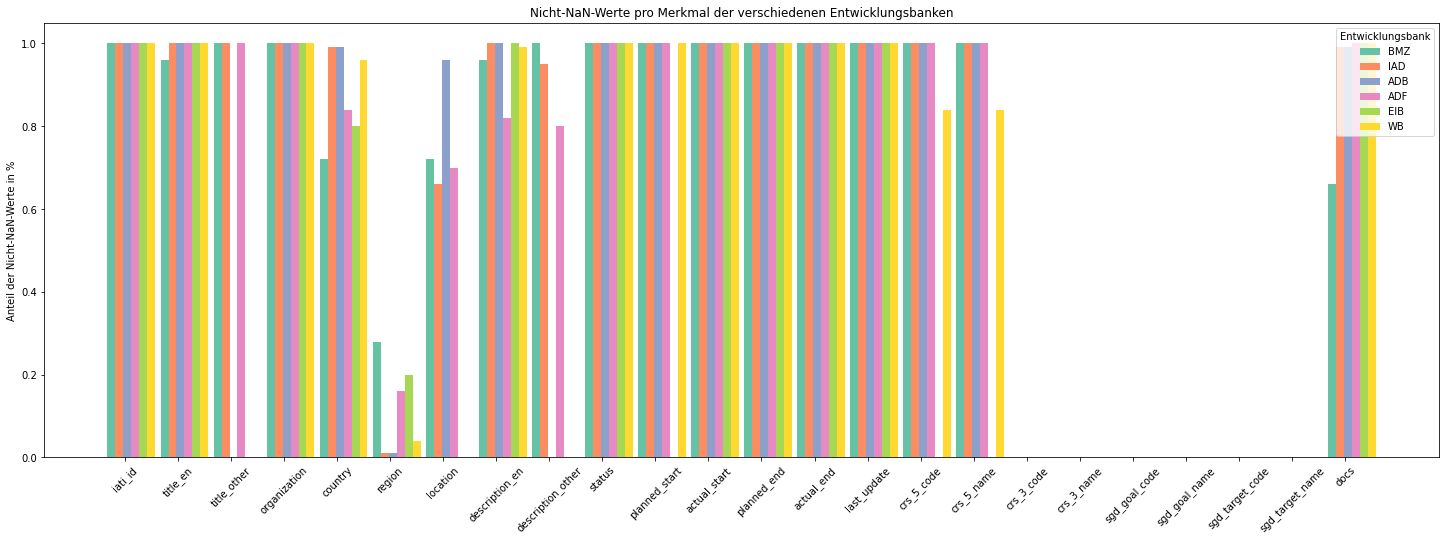

In [129]:
plt.figure(figsize=(25, 8))
palette = sns.color_palette("Set2")

for idx, (key, values) in enumerate(orgas.items()):
    plt.bar([i + idx*0.15 for i in range(len(values[1]))], values[1], width=0.15, label=key, color=palette[idx])

plt.title('Nicht-NaN-Werte pro Merkmal der verschiedenen Entwicklungsbanken')
plt.ylabel('Anteil der Nicht-NaN-Werte in %')
plt.xticks(ticks=[i + 0.25 for i in range(len(values[1]))], labels=columns, rotation=45)
plt.legend(title='Entwicklungsbank')
#plt.grid(True)
plt.show()